In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from tensorflow.keras.applications import ConvNeXtBase, ConvNeXtXLarge
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = '/Users/davemag9/Desktop/Diploma/archive1/Indian Food Images/Indian Food Images'

train_dir = '/Users/davemag9/Desktop/Diploma/food20dataset/train_set'
subdirectories = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if
                  os.path.isdir(os.path.join(train_dir, d))]
subdirectories

['/Users/davemag9/Desktop/Diploma/food20dataset/train_set/vada pav',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/idly',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/bisibelebath',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/ice_cream',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/samosa',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/paniyaram',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/chicken_curry',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/cheesecake',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/meduvadai',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/ven pongal',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/hot_dog',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/dhokla',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/apple_pie',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/chaat',
 '/Users/davemag9/Desktop/Dip

In [3]:
categories = sorted(os.listdir(train_dir))
categories = [category for category in categories if category != '.DS_Store']

categories

['apple_pie',
 'biriyani',
 'bisibelebath',
 'butternaan',
 'chaat',
 'chappati',
 'cheesecake',
 'chicken_curry',
 'dhokla',
 'dosa',
 'french_fries',
 'fried_rice',
 'gulab jamun',
 'halwa',
 'hamburger',
 'hot_dog',
 'ice_cream',
 'idly',
 'kathi roll',
 'meduvadai',
 'noodles',
 'omelette',
 'paniyaram',
 'pizza',
 'poori',
 'samosa',
 'sushi',
 'tandoori chicken',
 'upma',
 'vada pav',
 'ven pongal']

In [4]:
df = pd.DataFrame(columns=['image_path', 'label'])
df

,image_path,label


In [5]:
dfs = []

for category in categories:
    category_path = os.path.join(train_dir, category)
    image_data = []
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

In [6]:
dfs = []
max_images_per_category = 600

for category in categories:
    category_path = os.path.join(train_dir, category)
    image_data = []
    count = 0
    for image_name in os.listdir(category_path):
        if count >= max_images_per_category:
            break
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
        count += 1
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

In [7]:
df = pd.concat(dfs, ignore_index=True)
df

,image_path,label
0,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
1,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
2,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
3,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
4,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
...,...,...
2176,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal
2177,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal
2178,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal
2179,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal


In [8]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
train_df.shape

(1744, 2)

In [10]:
val_df.shape

(280, 2)

In [11]:
# test_df.shape

In [10]:
augmentation_params = {
    'rotation_range': 20,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1,
    'shear_range': 0.2,
    'zoom_range': 0.1,
    'horizontal_flip': True,
    'fill_mode': 'nearest'
}
img_size = (224, 224)
batch_size = 32

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    **augmentation_params
)
val_datagen = ImageDataGenerator(
    rescale=1. / 255
)

In [12]:
train_images = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=True,
    seed=42,
    class_mode='categorical'
)

Found 1735 validated image filenames belonging to 31 classes.


/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [13]:
val_images = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=False,
    seed=42,
    class_mode='categorical'
)

Found 435 validated image filenames belonging to 31 classes.


/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [14]:
pretrained_model = MobileNetV2(
    input_shape=(img_size[0], img_size[1], 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

outputs = Dense(len(categories), activation='softmax')(pretrained_model.output)

model_mn = Model(pretrained_model.input, outputs, name='MobileNetV2')

In [15]:
model_mn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
history_mn = model_mn.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.1673 - loss: 3.2006 - val_accuracy: 0.5103 - val_loss: 1.8521
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.6353 - loss: 1.4853 - val_accuracy: 0.6414 - val_loss: 1.3601
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.7324 - loss: 1.0646 - val_accuracy: 0.7011 - val_loss: 1.1687
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.7914 - loss: 0.8542 - val_accuracy: 0.7057 - val_loss: 1.0462
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.8133 - loss: 0.7005 - val_accuracy: 0.7011 - val_loss: 1.0291
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.8580 - loss: 0.6083 - val_accuracy: 0.6989 - val_loss: 0.9933
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 396s 7s/step - accuracy: 0.8795 - loss: 0.5283 - val_accuracy: 0.6989 - val_loss: 0.9909
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 406s 7s/step - accuracy: 0.8828 - loss: 0.4812 - val_accuracy: 0.7264 - va

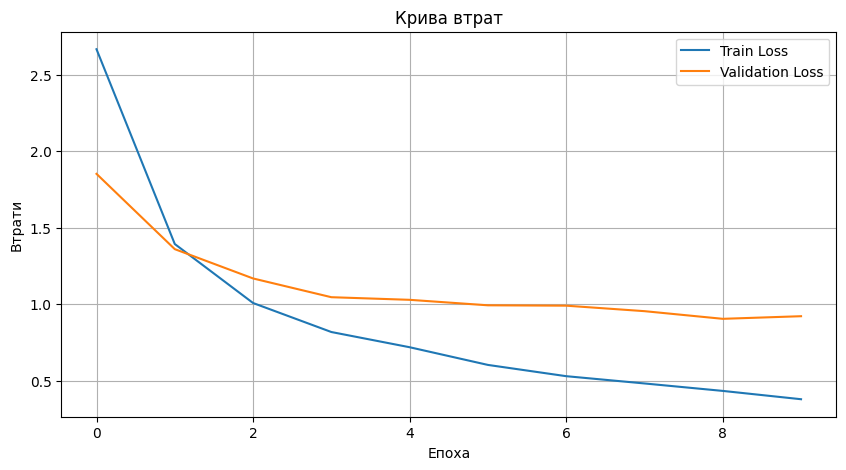

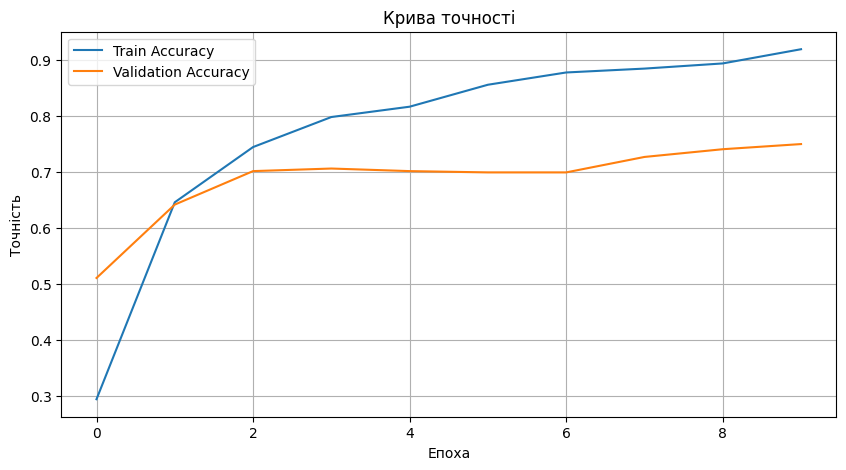

In [17]:
import matplotlib.pyplot as plt

# --- Побудова графіку втрат ---
plt.figure(figsize=(10, 5))
plt.plot(history_mn.history['loss'], label='Train Loss')
plt.plot(history_mn.history['val_loss'], label='Validation Loss')
plt.title('Крива втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()
plt.grid(True)
plt.show()

# --- Побудова графіку точності ---
plt.figure(figsize=(10, 5))
plt.plot(history_mn.history['accuracy'], label='Train Accuracy')
plt.plot(history_mn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Крива точності')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
test_dir = '/Users/davemag9/Desktop/Diploma/food20dataset/test_set'
subdirectories = [os.path.join(train_dir, d) for d in os.listdir(test_dir) if
                  os.path.isdir(os.path.join(test_dir, d))]

categories = sorted(os.listdir(test_dir))
categories = [category for category in categories if category != '.DS_Store']


df = pd.DataFrame(columns=['image_path', 'label'])

dfs = []

for category in categories:
    category_path = os.path.join(test_dir, category)
    image_data = []
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)


dfs = []
max_images_per_category = 600

for category in categories:
    category_path = os.path.join(test_dir, category)
    image_data = []
    count = 0
    for image_name in os.listdir(category_path):
        if count >= max_images_per_category:
            break
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
        count += 1
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

test_df = pd.concat(dfs, ignore_index=True)


test_datagen = ImageDataGenerator(
    rescale=1. / 255
)

test_images = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=False,
    seed=42,
    class_mode='categorical'
)

Found 930 validated image filenames belonging to 31 classes.


In [19]:
predictions = model_mn.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

predicted_classes[:80]

/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 522ms/step


array([16,  0,  0, 21, 16, 18,  3, 13, 21,  9, 11, 13,  6,  0,  1,  7,  0,
       26, 23,  0,  7,  6, 14,  9,  0,  9,  7, 16, 21, 30,  1,  1,  1,  1,
       11,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1, 27,  1,  4,  1, 27,
        1,  1, 11, 20,  4,  1,  1,  4,  8,  4, 13,  2, 30,  2, 13, 13, 28,
       13,  2, 28, 13, 30,  2,  2,  2,  4,  5,  2,  2])

In [20]:
true_classes = test_images.classes
class_labels = list(val_images.class_indices.keys())
num_images = 25
count = 0

while count < num_images:
    print(f"{count + 1}. Label: {true_classes[count]}, Prediction: {predicted_classes[count]}")
    count += 1

1. Label: 0, Prediction: 16
2. Label: 0, Prediction: 0
3. Label: 0, Prediction: 0
4. Label: 0, Prediction: 21
5. Label: 0, Prediction: 16
6. Label: 0, Prediction: 18
7. Label: 0, Prediction: 3
8. Label: 0, Prediction: 13
9. Label: 0, Prediction: 21
10. Label: 0, Prediction: 9
11. Label: 0, Prediction: 11
12. Label: 0, Prediction: 13
13. Label: 0, Prediction: 6
14. Label: 0, Prediction: 0
15. Label: 0, Prediction: 1
16. Label: 0, Prediction: 7
17. Label: 0, Prediction: 0
18. Label: 0, Prediction: 26
19. Label: 0, Prediction: 23
20. Label: 0, Prediction: 0
21. Label: 0, Prediction: 7
22. Label: 0, Prediction: 6
23. Label: 0, Prediction: 14
24. Label: 0, Prediction: 9
25. Label: 0, Prediction: 0


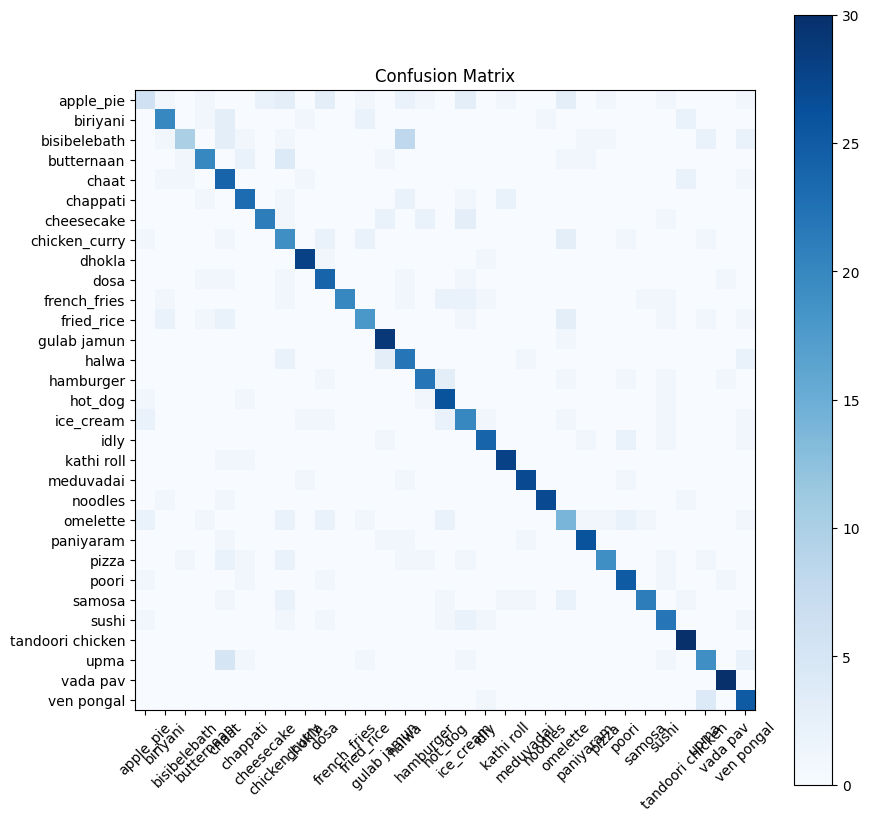

In [21]:
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

plt.show()

In [22]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

                  precision    recall  f1-score   support

       apple_pie       0.43      0.20      0.27        30
        biriyani       0.74      0.67      0.70        30
    bisibelebath       0.77      0.33      0.47        30
      butternaan       0.77      0.67      0.71        30
           chaat       0.53      0.80      0.64        30
        chappati       0.74      0.77      0.75        30
      cheesecake       0.91      0.70      0.79        30
   chicken_curry       0.47      0.63      0.54        30
          dhokla       0.88      0.93      0.90        30
            dosa       0.67      0.80      0.73        30
    french_fries       1.00      0.67      0.80        30
      fried_rice       0.72      0.60      0.65        30
     gulab jamun       0.78      0.97      0.87        30
           halwa       0.56      0.73      0.64        30
       hamburger       0.81      0.73      0.77        30
         hot_dog       0.70      0.87      0.78        30
       ice_cr

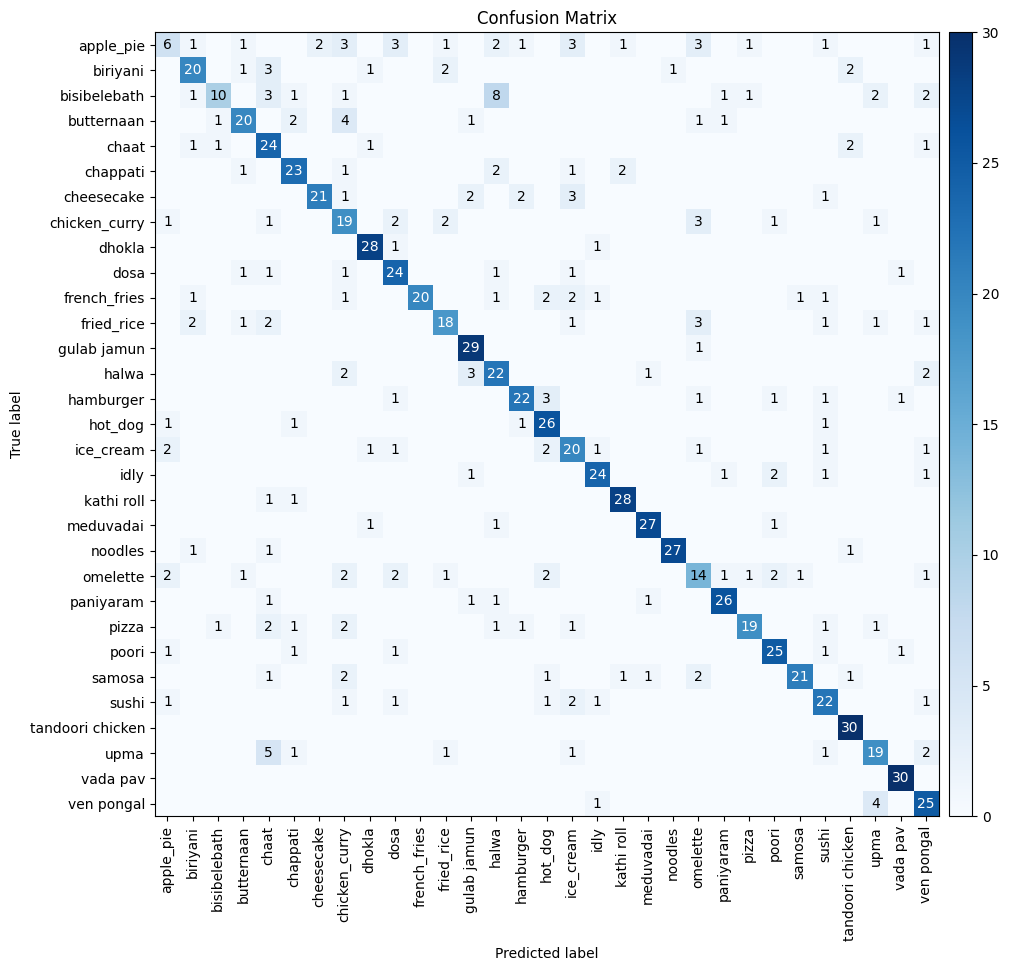

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Припускаємо, що у тебе вже є:
# true_classes = [...]
# predicted_classes = [...]
# class_labels = [...]

cm = confusion_matrix(true_classes, predicted_classes)

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')

tick_marks = np.arange(len(class_labels))
ax.set_xticks(tick_marks)
ax.set_xticklabels(class_labels, rotation=90)
ax.set_yticks(tick_marks)
ax.set_yticklabels(class_labels)

# Підпис значень у клітинках, крім 0
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] != 0:
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

# Зменшення ширини colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)  # size визначає ширину
plt.colorbar(im, cax=cax)

fig.tight_layout()
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
plt.show()